202204
C:/Users/USER/Downloads/ST43_5351_202204.csv
C:/Users/USER/python_web_crawler/python_orgininal_codes/ch12/5351_202204.csv
更名及移動失敗
5351_202204.csv
111/04/01
2022-04-01 00:00:00
111/04/06
2022-04-06 00:00:00
111/04/07
2022-04-07 00:00:00
111/04/08
2022-04-08 00:00:00
111/04/11
2022-04-11 00:00:00
111/04/12
2022-04-12 00:00:00
111/04/13
2022-04-13 00:00:00
111/04/14
2022-04-14 00:00:00
111/04/15
2022-04-15 00:00:00


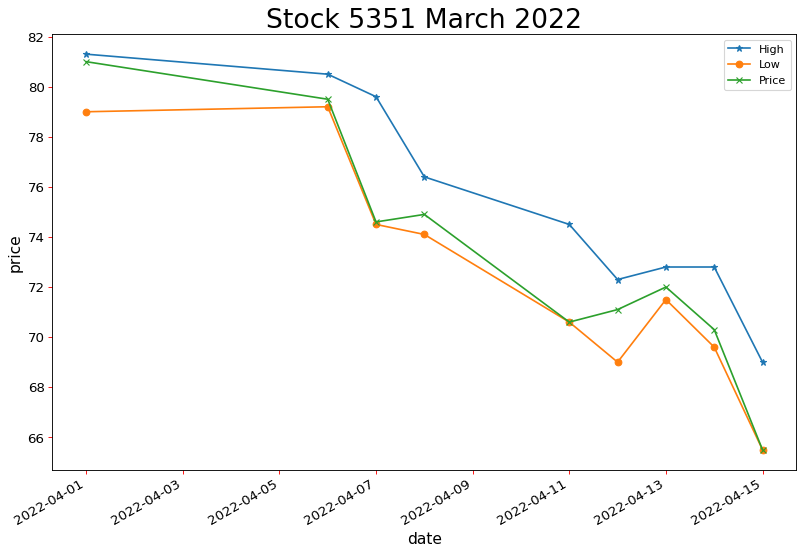

In [2]:
# 爬蟲取讀個股成交資訊的收盤價數據並畫圖

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from datetime import datetime
import matplotlib.pyplot as plt
import time,os,csv

num='5351' # 股票號碼
url='https://www.tpex.org.tw/web/stock/aftertrading/daily_trading_info/st43.php?l=zh-tw'
driver_path=Service('D:/chromedriver.exe')
driver=webdriver.Chrome(service=driver_path)
driver.get(url)

tag_1=driver.find_element(By.CSS_SELECTOR,'#input_stock_code')
tag_1.send_keys(num)
tag_1.send_keys(Keys.ENTER)
time.sleep(3)

#driver.find_elements(By.CLASS_NAME,'download-csv')  # 同下結果 這也可以 只是要指定索引.click()
driver.find_element(By.CSS_SELECTOR,'.rpt-search button[onclick="downloadCSV()"]').click()  # 更快 直接找到不用取索引
time.sleep(10)  # 給點時間掃毒

# 根據下載檔名 找到今天的年月日期
date_now=datetime.now().strftime('%Y%m')
print(date_now)

# 設定新檔名與新路徑
new_name=num+'_'+date_now+'.csv'
old_path_name=r'C:/Users/USER/Downloads/ST43_'+new_name
new_path_name=r'C:/Users/USER/python_web_crawler/python_orgininal_codes/ch12/'+new_name
print(old_path_name)
print(new_path_name)

# 用try except確認os.rename是否更改及移動成功
try:
    os.rename(old_path_name,new_path_name)
    print('更名及移動成功')
except Exception as err:
    print('更名及移動失敗')
    
driver.close()
print(new_name)

# 打開剛下載好並更名的檔案
with open(new_name) as csv_file:
    csv_reader=csv.reader(csv_file)  # 透過csv.reader將csv檔轉為二維list
    csv_list=list(csv_reader)
    dates_list,highs_list,lows_list,prices_list=[],[],[],[]
    for c in csv_list[5:-1]:
        print(c[0])
        try:
            dates_=c[0].replace('111','2022')
            dates=datetime.strptime(dates_,'%Y/%m/%d')  # strptime由字串格式轉化為日期要用/分隔 設定時間序列 日期會自動間隔
            print(dates)
            highs=float(c[4])  # 線條一定要轉成float或int 否則圖會以字串順序來畫 超亂
            lows=float(c[5])
            prices=float(c[6])
        except Exception:
            print('有缺值')   # 有找不到的值會出現這個
        else:
            dates_list.append(dates)
            highs_list.append(highs)
            lows_list.append(lows)
            prices_list.append(prices)

# 開始畫圖
fig=plt.figure(dpi=80,figsize=(12,8))   # 設定繪圖區大小
# 線條內容一定要是float或int 否則圖會以字串順序來畫 超亂
plt.plot(dates_list,highs_list,'-*',label='High')   # plot(x要放甚麼,y要放甚麼,線條樣式,label名稱)
plt.plot(dates_list,lows_list,'-o',label='Low')
plt.plot(dates_list,prices_list,'-x',label='Price')
fig.autofmt_xdate()  # 畫完線再旋轉日期

# 繪製圖例
plt.legend(loc='best') # 圖例位置
plt.title('Stock 5351 March 2022',fontsize=24)
plt.xlabel('date',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.tick_params(axis='both',labelsize=12,color='red')  # 設定刻度
plt.show()

In [ ]:
# 繪製台灣證卷交易所的台泥年度收盤價分析
import csv
import matplotlib.pyplot as plt
from datetime import datetime

fn='FMNPTK_1101.csv'
with open(fn) as csv_file:
    csv_reader=csv.reader(csv_file)
    csv_list=list(csv_reader)
    years_list,highs_list,lows_list,prices_list=[],[],[],[]
    for c in csv_list[2:-5]:
        #print(c)
        try:
            years=int(c[0])+1911  # 轉換成西元年
            highs=float(c[4])
            lows=float(c[6])
            prices=float(c[8])
            #print('沒有空值')
        except Exception as err:
            print('有空值')
        else:
            years_list.append(years)
            highs_list.append(highs)
            lows_list.append(lows)
            prices_list.append(prices)
            
# 開始畫圖
fig=plt.figure(dpi=80,figsize=(12,8))
plt.plot(years_list,highs_list,'-*',label='High')
plt.plot(years_list,lows_list,'-o',label='Low')
plt.plot(years_list,prices_list,'-v',label='Price')
plt.legend(loc='best')  # 繪製圖例
fig.autofmt_xdate()  # x軸旋選

plt.title('Taiwan Cement Company',fontsize=24)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Price',fontsize=14)
# tick_params(axis='both'都改,labelsize=字的大小,color=刻度顏色)
plt.tick_params(axis='both',labelsize=12,color='red')
plt.show()

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

url='https://www.twse.com.tw/zh/'
driver_path=Service('D:/chromedriver.exe')
driver=webdriver.Chrome(service=driver_path)
driver.get(url)

tag_1=driver.find_elements(By.CSS_SELECTOR,'#layout #mega ul li')
print(tag_1[2].text)
# tag_1[0].a.click()

# tag_2=tag_1.find_element('ul li')
# tag_2[11].a.click()

# driver.close()

In [ ]:
# https://www.twse.com.tw/zh/page/trading/exchange/MI_5MINS.html
# 將每5秒的股票成交資訊存取成每30分鐘列出累積成交量
import csv,re

old_fn='MI_5MINS_20220329.csv'
new_fn='MI_30MINS_20220329.csv'

reg="[^0-9:]"  # 正規表達式取需要的字串
with open(new_fn,'w',newline='') as w_csv_file:   # newline=''寫入csv不要空一行
    w_csv_writer=csv.writer(w_csv_file)           # csv.writer儲存成csv格式
    w_csv_writer.writerow(['時間','累積成交數'])   # writerow一行一行寫入 增列
    with open(old_fn,'r') as r_csv_file:
        r_csv_reader=csv.reader(r_csv_file)       # csv.reader用csv格式讀取成二維list
        r_csv_list=list(r_csv_reader)
        for r in r_csv_list[2:-9]:       
            r[0]=re.sub(reg,'',r[0])  # 正規表達式取需要的字串 不要的去除
            print(r[0])
            mins=r[0][3:5]   # 取分的數字
            secs=r[0][6:8]   # 取秒的數字
            #print(mins,secs)
            if mins=='00' or mins=='30':
                if secs=='00':  # 每分的0秒那筆
                    w_csv_writer.writerow([r[0],r[6]])

In [ ]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime

new_fn='MI_30MINS_20220329.csv'
with open(new_fn) as csv_file:
    csv_reader=csv.reader(csv_file)
    csv_list=list(csv_reader)
    times_list,trades_list=[],[]
    for c in csv_list[1:]:
        print(c)
        try:
            times=c[0]
            trades=c[1]
            print('沒有缺值')
        except Exception as err:
            print('有缺值')
        else:
            times_list.append(times)
            trades_list.append(trades)
            
# 開始畫圖
fig=plt.figure(dpi=80,figsize=(12,8))  # 設定繪圖區大小
plt.plot(times_list,trades_list,'-*',label='Trades')
plt.legend(loc='best')
fig.autofmt_xdate()

plt.title('Accumulated deal every 30 minutes',fontsize=24)
plt.xlabel('Time',fontsize=14)
plt.ylabel('accumulated deal',fontsize=14)
plt.tick_params(axis='both',labelsize=12,color='blue') # 設定刻度
plt.show()

In [ ]:
# 爬蟲YAHOO股市台積電股價收盤資訊
import requests,bs4

url='https://tw.stock.yahoo.com/quote/2330'
html=requests.get(url)
obj_soup=bs4.BeautifulSoup(html.text,'lxml')

obj_name=obj_soup.find('div',id='main-0-QuoteHeader-Proxy').h1.text.strip()
obj_num=obj_soup.find('div',id='main-0-QuoteHeader-Proxy').find('span','C($c-icon)').text.strip()
obj_ul=obj_soup.find('ul','Mx(-16px)').find_all('li','price-detail-item')
print(obj_name,obj_num)
print('-'*15)
for ul in obj_ul:
    title=ul.find('span','C(#232a31)').text.strip()
    num=ul.find('span','Fw(600)').text.strip()
    print(title,':',num)

In [ ]:
# 使用Stock()讀取台灣股市資料及製作折線圖
# 使用Stock()不可重複執行jupyter會出錯 stock_2330.price也不可重複使用
import twstock
import matplotlib.pyplot as plt

stock_2330=twstock.Stock('2330')
# 顯示中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.title('台積電',fontsize=24)
plt.plot(stock_2330.price)  # 結果是list所以可以直接畫圖
plt.show()

print('股票代號:',stock_2330.sid)
# print('股票開盤價:',stock_2330.open)
# print('股票最高價(元):',stock_2330.high)
# print('股票成交量(股):',stock_2330.capacity)
# print('股票帳跌幅(元):',stock_2330.change)
print()
print('31天前的收盤價為[0]:',stock_2330.price[0])
print('前一個交易日的收盤價為[30]:',stock_2330.price[30])
print(stock_2330.price)
print('了解台積電data全部屬性內容:',stock_2330.data)

傳回所有指定年月交易資料: [Data(date=datetime.datetime(2020, 4, 1, 0, 0), capacity=47572034, turnover=13022612818, open=276.5, high=276.5, low=271.5, close=271.5, change=-2.5, transaction=19580), Data(date=datetime.datetime(2020, 4, 6, 0, 0), capacity=59712754, turnover=16324198154, open=273.0, high=275.5, low=270.0, close=275.5, change=4.0, transaction=19971), Data(date=datetime.datetime(2020, 4, 7, 0, 0), capacity=48887346, turnover=13817936851, open=283.5, high=284.0, low=280.5, close=283.0, change=7.5, transaction=24281), Data(date=datetime.datetime(2020, 4, 8, 0, 0), capacity=38698826, turnover=11016972354, open=285.0, high=285.5, low=283.0, close=285.0, change=2.0, transaction=19126), Data(date=datetime.datetime(2020, 4, 9, 0, 0), capacity=29276430, turnover=8346209654, open=287.5, high=288.0, low=282.5, close=283.0, change=-2.0, transaction=15271), Data(date=datetime.datetime(2020, 4, 10, 0, 0), capacity=28206858, turnover=7894277586, open=280.0, high=282.0, low=279.0, close=279.5, change=-

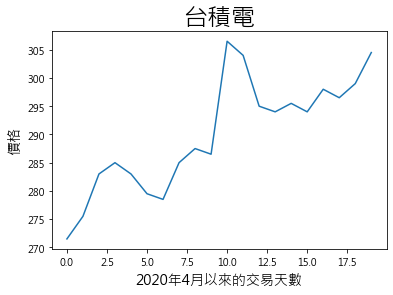

In [1]:
import twstock
import matplotlib.pyplot as plt

stock_2330=twstock.Stock('2330')
print('傳回所有指定年月交易資料:',stock_2330.fetch(2020,4))
print('接續傳回指定年月收盤價格資料:',stock_2330.price)

stock_2330.fetch_from(2020,4)
# stock_2330.moving_average(stock_2330.price,5)

# 顯示中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.plot(stock_2330.price)
plt.title('台積電',fontsize=24)
plt.xlabel('2020年4月以來的交易天數',fontsize=14)
plt.ylabel('價格',fontsize=14)
plt.show()

In [1]:
# realtime.get()取得單一股票的即時資料
import twstock
import pandas as pd

stock_2330=twstock.realtime.get('2330')
bid_price=stock_2330['realtime']['best_bid_price']
bid_volume=stock_2330['realtime']['best_bid_volume']
ask_price=stock_2330['realtime']['best_ask_price']
ask_volume=stock_2330['realtime']['best_ask_volume']

dict_2330={'Buy':bid_price,'B_volume':bid_volume,'Sell':ask_price,'S_volume':ask_volume}
df=pd.DataFrame(dict_2330,index=range(1,6))
df

,Buy,B_volume,Sell,S_volume
1,588.0000,48,589.0000,598
2,587.0000,70,590.0000,1538
3,586.0000,656,591.0000,787
4,585.0000,2249,592.0000,454
5,584.0000,1768,593.0000,115


In [8]:
# 爬取國際股市 使用全selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time

url='https://www.bloomberg.com/quote/CCMP:IND'
driver_path=Service('D:/chromedriver.exe')
driver=webdriver.Chrome(service=driver_path)
driver.get(url)

tag_1=driver.find_element(By.CLASS_NAME,'snapshotSummary__1e0c7a0dea')
t_1=tag_1.find_element(By.CLASS_NAME,'companyId__dc5496abc5').text.strip()
t_2=tag_1.find_element(By.CLASS_NAME,'companyName__1af0080d26').text.strip()
t_3=tag_1.find_element(By.CLASS_NAME,'priceText__06f600fa3e').text.strip()
t_4=tag_1.find_element(By.CLASS_NAME,'changeAbsolute__cd26c98843').text.strip()
t_5=tag_1.find_element(By.CLASS_NAME,'changePercent__fa57affaae').text.strip()

print(t_1)
print(t_2)
print(t_3)
print(t_4,t_5)

driver.close()

CCMP:IND
NASDAQ Composite Index
14,261.50
+40.98 +0.29%


In [17]:
# 爬取國際股市 使用selenium+bs4+正規表達式
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time,bs4,requests,re

url='https://www.bloomberg.com/quote/CCMP:IND'
driver_path=Service('D:/chromedriver.exe')
driver=webdriver.Chrome(service=driver_path)
driver.get(url)
obj_soup=bs4.BeautifulSoup(driver.page_source,'lxml')

ccmp=re.compile('companyId*')  # 找這個id
ccmp_box=obj_soup.find('span',class_=ccmp)
# ccmp_box=obj_soup.find('span','companyId__dc5496abc5')  #用bs4方法找
ccmp_title=ccmp_box.text
print(ccmp_title)

company=re.compile('companyName*')
company_box=obj_soup.find('div',class_=company)
company_title=company_box.text
print(company_title)

price=re.compile('priceText*')
price_box=obj_soup.find('span',class_=price)
price_title=price_box.text
print(price_title)

t=re.compile('changeAbsolute*')
t_box=obj_soup.find('span',class_=t)
t_title=t_box.text

c=re.compile('changePercent*')
c_box=obj_soup.find('span',class_=c)
c_title=c_box.text
print(t_title,'_',c_title)

driver.close()

CCMP:IND
NASDAQ Composite Index
14,261.50
+40.98 _ +0.29%


In [15]:
# 網路範例
import pandas as pd

groups = ["Modern Web", "DevOps", "Cloud", "Big Data", "Security", "自我挑戰組"]
ironmen = [59, 9, 19, 14, 6, 77]

ironmen_dict = {
                "groups": groups,
                "ironmen": ironmen
}

# 建立 data frame
ironmen_df = pd.DataFrame(ironmen_dict)

# 刪除觀測值
ironmen_df_no_mw = ironmen_df.drop(0, axis = 0)  # 根據index
print(ironmen_df_no_mw)
print("---") # 分隔線

# 刪除欄位
ironmen_df_no_groups = ironmen_df.drop("groups", axis = 1)  # 根據name
print(ironmen_df_no_groups)

     groups  ironmen
1    DevOps        9
2     Cloud       19
3  Big Data       14
4  Security        6
5     自我挑戰組       77
---
   ironmen
0       59
1        9
2       19
3       14
4        6
5       77


In [ ]:
# os.rename更改及移動下載的名字 測試
from datetime import datetime
import os,shutil

date_now=datetime.now().strftime('%Y%m')
print(date_now)

old_name=r'C:/Users/USER/Downloads/ST43'+'_'+num+'_'+date_now+'.csv'
new_name=r'C:/Users/USER/python_web_crawler/python_orgininal_codes/ch12/'+num+'_'+date_now+'.csv'

print(old_name)
print(new_name)
try:
    os.rename(old_name,new_name)
    print('更改及移動成功')
except Exception as err:
    print('更改及移動失敗')

# 正規表達式 測試
import re

g='="09:00:00"'
r="[^0-9:]"
g=re.sub(r,'',g)
g